# Promoted Feature Analysis of the Company-X

Welcome to Company-X, an e-commerce platform where sellers can list their products to find buyers. In this competitive marketplace, we know it's common for there to be more stuff for sale than people looking to buy. But our main goal is to make our sellers happy.

To help sellers get more chances to sell their items, we offer different ways to promote their products. One of these options is the "Promoted" feature, which boosts the visibility of their items.

When sellers use the "Promoted" feature, it makes their products more visible to potential buyers for three days. This means more people see the items on the homepage and in relevant categories, which usually leads to more views. Right now, sellers can get this feature for just €2.

Company-X is currently thinking about whether this is the best way to make money from our value-added services. We're also planning to use data to figure out if this strategy is working well and how we can make it even better for the long term.

In [1]:
import pandas as pd # Data Manipulation
import numpy as np # Data Manipulation

import warnings
import helper

warnings.filterwarnings("ignore")

## Importing the data

- Renaming columns
- Applying COALESCE() function/fillna to handle null values
- Generating new columns: total_amount, promoted_count

In [2]:
df = helper.fetch_csv("data_sources/company_x_promoted.csv")

# rename 
df = df.rename(columns={ 
    "avg_listing_price_eur": "avg_price",
    "number_of_listings": "total_count",
    "revenue_from_promoted": "promoted_revenue"
})

# fill na
df["category"] = df["category"].fillna("unknown")
df["sub_category"] = df["sub_category"].fillna("unknown")
df["total_count"] = df["total_count"].fillna(0)
df["avg_price"] = df["avg_price"].fillna(0)
df["promoted_revenue"] = df["promoted_revenue"].fillna(0)

# enhance 
df["total_amount"] = df["avg_price"] * df["total_count"]
df["promoted_count"] = df["promoted_revenue"] / 2 

# do not enhance cost_rate and promoted_rate as they are aggregated fields which will be dependent on the dataset

df.head()

,category,sub_category,total_count,avg_price,promoted_revenue,total_amount,promoted_count
0,ACCESSORIES_JEWELLERY,BELTS,29838,21.273161,1382.0,6.347486e+05,691.0
1,ACCESSORIES_JEWELLERY,GLOVES,6350,17.043860,304.0,1.082285e+05,152.0
2,ACCESSORIES_JEWELLERY,JEWELRY,343493,17.935880,20554.0,6.160849e+06,10277.0
3,ACCESSORIES_JEWELLERY,KEY_RINGS,5,15.900000,0.0,7.950000e+01,0.0
4,ACCESSORIES_JEWELLERY,OTHER_ACCESSORIES_AND_JEWELLERY,52245,33.023548,2782.0,1.725315e+06,1391.0


In [3]:
def enhance(df):
    df_enhance = df.copy()

    df_enhance["avg_price"] = df_enhance["total_amount"] / df_enhance["total_count"]
    df_enhance["promoted_rate"] = df_enhance["promoted_count"] / df_enhance["total_count"]
    df_enhance["cost_rate"] = 2 / df_enhance["avg_price"]

    return df_enhance

In [4]:
helper.perform_data_checks(enhance(df))


        No missing values found. 

        Duplicate rows found. 

            Outliers found in column 'total_count': 

            Outliers found in column 'avg_price': 

            Outliers found in column 'promoted_revenue': 

            Outliers found in column 'total_amount': 

            Outliers found in column 'promoted_count': 

            Outliers found in column 'promoted_rate': 

            No outliers found in column 'cost_rate'. 


In [5]:
df = df.drop_duplicates()

# Section - I : Evaluate current situation

## A: What affects on what?

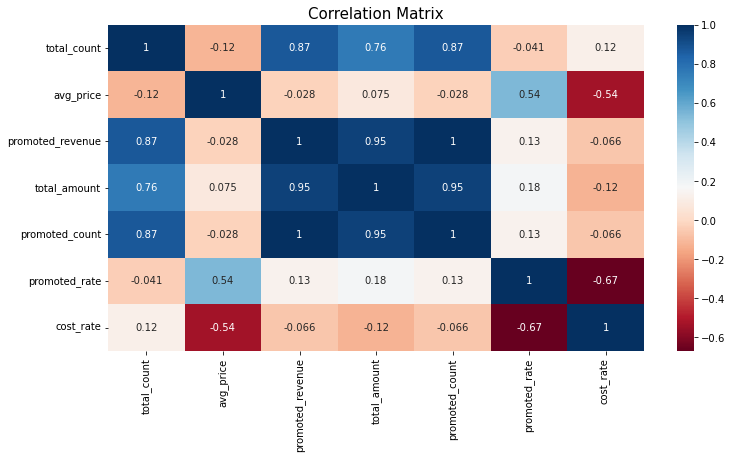

In [6]:
helper.plot_correlation_heatmap(df=enhance(df));

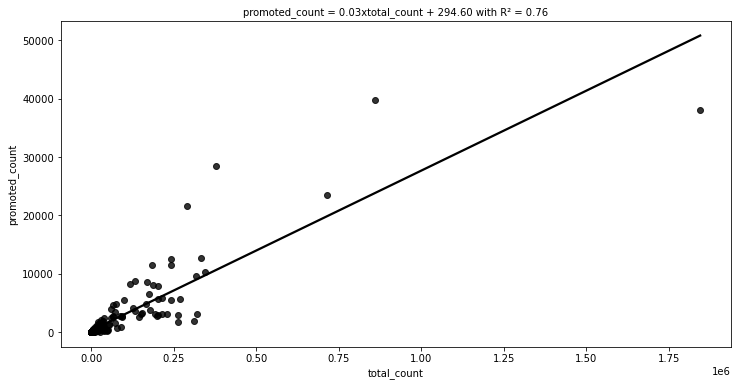

In [7]:
helper.plot_linear_regressions(enhance(df).query("promoted_count > 0"),
                               x_axis="total_count",
                               y_axis="promoted_count",
                               ols=True);

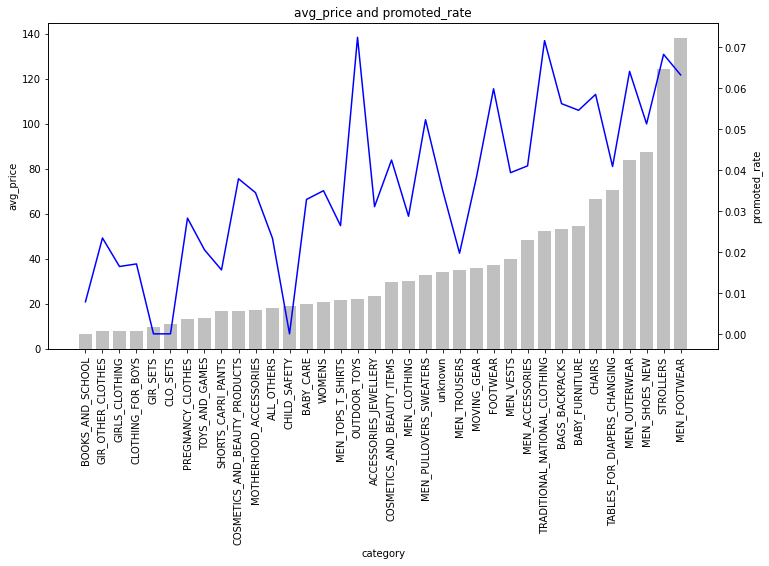

In [8]:
helper.plot_combo_box(df=enhance(df.groupby("category").sum().reset_index()),
                      x_axis="category",
                      y1="avg_price",
                      y2="promoted_rate",
                      sort_by="avg_price");

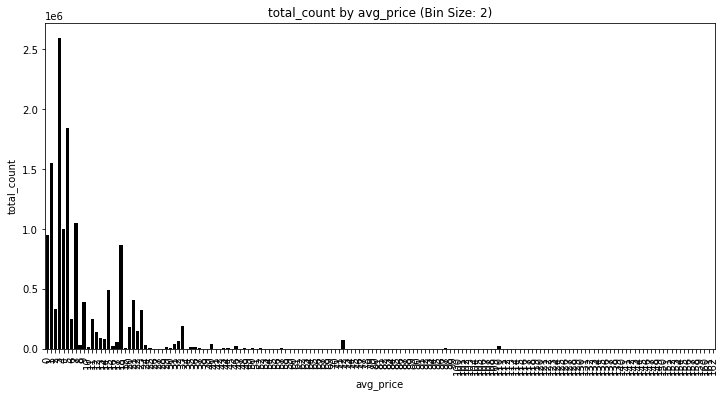

In [9]:
helper.plot_histogram(df, "avg_price", 2, "total_count");

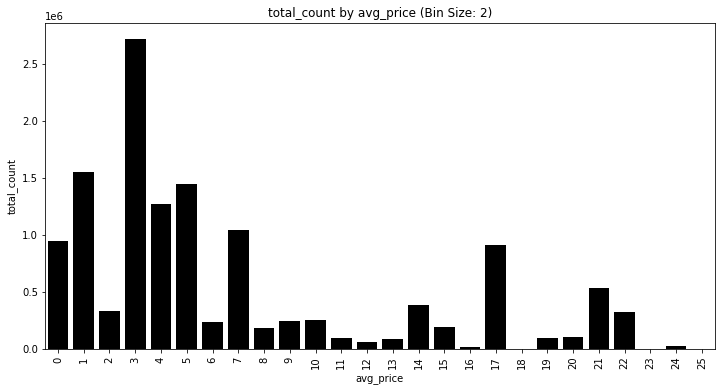

In [10]:
helper.plot_histogram(df = enhance(df).query("avg_price < 60"), 
                      bin_by="avg_price", 
                      bin_size=2, 
                      bars_by="total_count");

In [11]:
helper.assign_box_plot_values(df,"avg_price");


        lower_hinge = 11.503139359999999,
        median = 20.69289092,
        mean = 33.60251184995596
        upper_hinge = 43.242685085
        upper_whisker = 90.85200367249999
        


Slope: -1.063200324171972
Intercept: 0.0021383030451415383
R2 = % 70.30999999999999


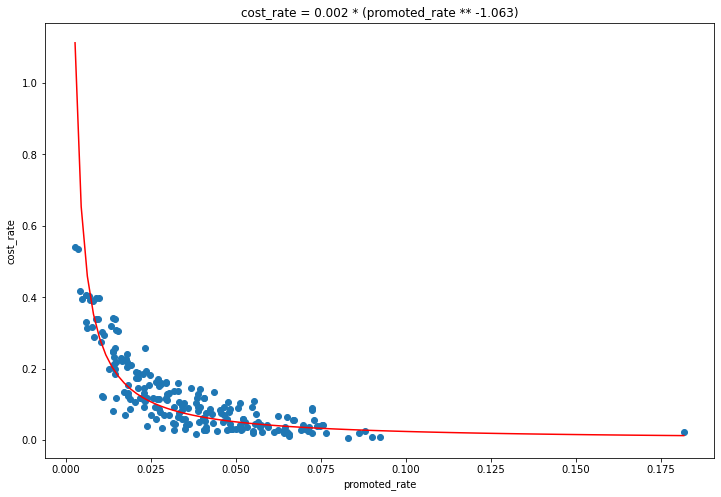

In [12]:
intercept, slope = helper.power_regression(df = enhance(df).query("promoted_count > 0"), 
                        x_axis= "promoted_rate",
                        y_axis="cost_rate")